#***Classification Modelling of Weekly Market Data and Automobile Data using Logistic Regression and KNN Classifier***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Introduction:
Logistic Regression & K-Nearest Neighbors(KNN) are one of the most powerful supervised learning algorithms in machine learning. Logistic Regression is a statistical method for predicting binary outcomes. It estimates the probability that a given input point belongs to a certain category, making it highly applicable for scenarios where you're dealing with two possible outcomes.K-Nearest Neighbors (KNN), on the other hand, is used for both classification and regression tasks. It operates on the principle that similar things exist in close proximity, i.e., the nearest neighbors to a point are likely to have similar properties or classifications.
While both KNN and Logistic Regression can be used for classification problems, they approach the task differently- Logistic Regression is a parametric approach but KNN is non-parametric, it relies on the distance between feature vectors and requires no model to be fit in advance.

# Objective:
The objective of the notebook is divided in two sections- For the weekly data, by seeing the percentage and volume of shares, we aim to find out whether the market is going in a positive or negative trend and finding out predictions based on it. For the automobile data, using the characteristics of vehicle and engine, we try to measure and predict a measure of fuel efficiency, indicating how many miles a vehicle can travel per gallon of fuel.

>[Classification Modelling of Weekly Market Data and Automobile Data using Logistic Regression and KNN Classifier](#scrollTo=GXfH2L2LsxrR)

>[Introduction:](#scrollTo=yuGXmEd1QXlK)

>[Objective:](#scrollTo=yuGXmEd1QXlK)

>[Question 1: Weekly dataset](#scrollTo=WhCzuLjuhke-)

>>[Data Description](#scrollTo=WhCzuLjuhke-)

>>[Exploratory Data Analysis:](#scrollTo=aaTIS_eGjLfc)

>>[Logistic Regression:](#scrollTo=n7nmakTiksTf)

>>[Confusion Matrix and Accuracy:](#scrollTo=A4UXwKnjlxCz)

>>[Logistic Regression with dynamic time spans:](#scrollTo=76oA5GK_l9h6)

>>[KNN Classifier:](#scrollTo=h4FDJDx9mu2A)

>[Question 2: Auto dataset](#scrollTo=fRnRiLHmokqJ)

>>[Data Description:](#scrollTo=fRnRiLHmokqJ)

>>[Exploratory Data Analysis based on Median:](#scrollTo=uWRw0lCdpyup)

>>[Logistic Regression:](#scrollTo=J8lmdjLwqwfq)

>>[KNN Classifier:](#scrollTo=YFPT5rjvrxf_)

>[Conclusions:](#scrollTo=HYWU5Syxscwk)



# **Question 1: Weekly dataset**
## Data Description
The Weekly data set is part of the ISLP package. This data is similar in nature to the
Smarket data, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

The variables are:

Year: The year that the observation was recorded

Lag1: Percentage return for previous week

Lag2: Percentage return for 2 weeks previous

Lag3: Percentage return for 3 weeks previous

Lag4: Percentage return for 4 weeks previous

Lag5: Percentage return for 5 weeks previous

Volume: Volume of shares traded (average number of daily shares traded in billions)

Today: Percentage return for this week

Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.

In [ ]:
Weekly=pd.read_csv('/content/drive/MyDrive/Weekly - Weekly.csv')
df=Weekly.copy()

In [ ]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
Weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [ ]:
Weekly.shape

(1089, 9)

There are a total of 1089 values corresponding to several lags, the year and volume of data, as what the variable says.

In [ ]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
null_values = Weekly.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64


No null values are present in the data.

In [ ]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


All the variables that will participate in the further modelling are of numeric type, except the variable in concern, i.e Direction itself, which is a categorical response.

In [ ]:
Weekly['Direction'].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

There are more number of increasing motion in the market data than downfall, as is seen from the count.

## Exploratory Data Analysis:

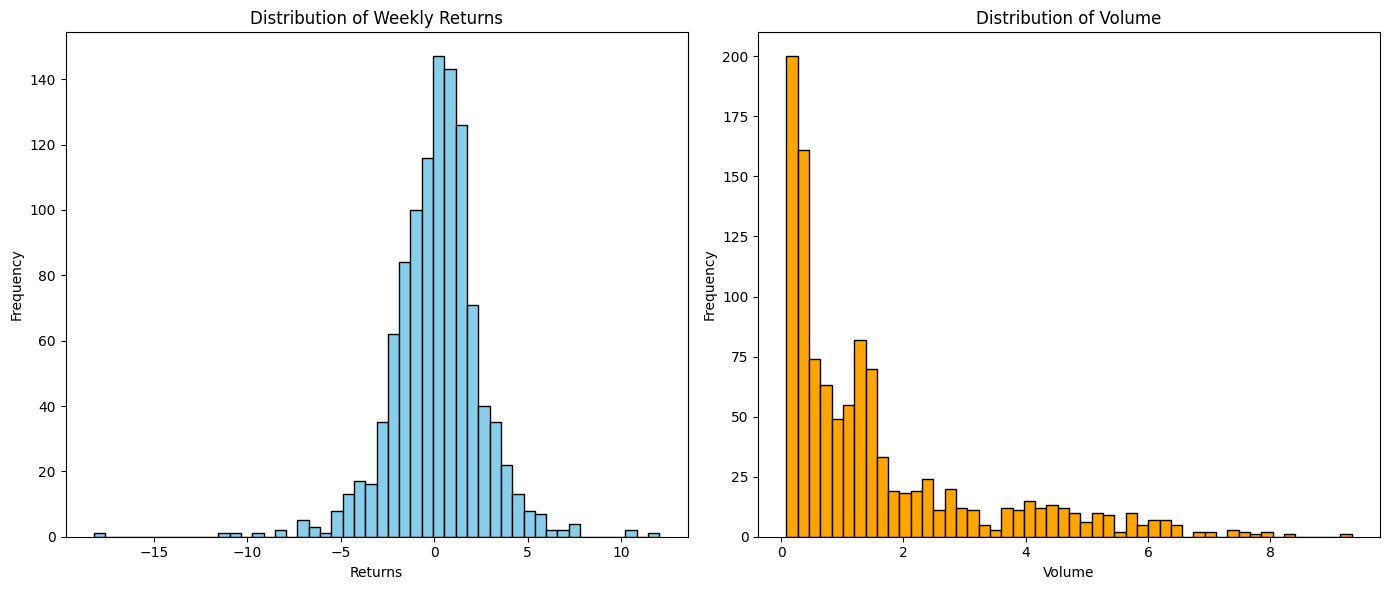

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Today'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Volume'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The weekly returns are almost normally distributed as is seen from the blue bars, with variability lying between -5 to 5, but overall, centred around zero with the highest frequency.

For the second graph, the distribution is positively skewed and we can see the volume is mostly low with only few going to 8 or above.

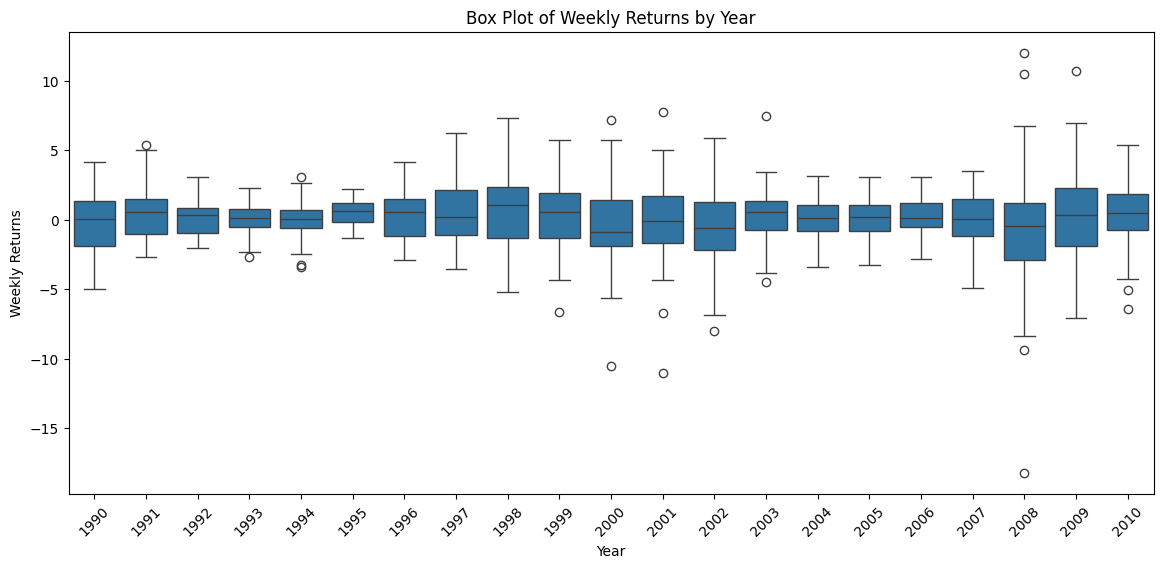

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Today', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Weekly Returns by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Returns')
plt.show()

To showcase continuous data of weekly returns on the basis of each year, a box plot is created.

Here, it can be seen clearly that in almost all the years the returns are centred around zero with only minor deviations.

The year 2008 has seen highest variabliity in data where negative to maximum returns in the same year, but median still around zero.

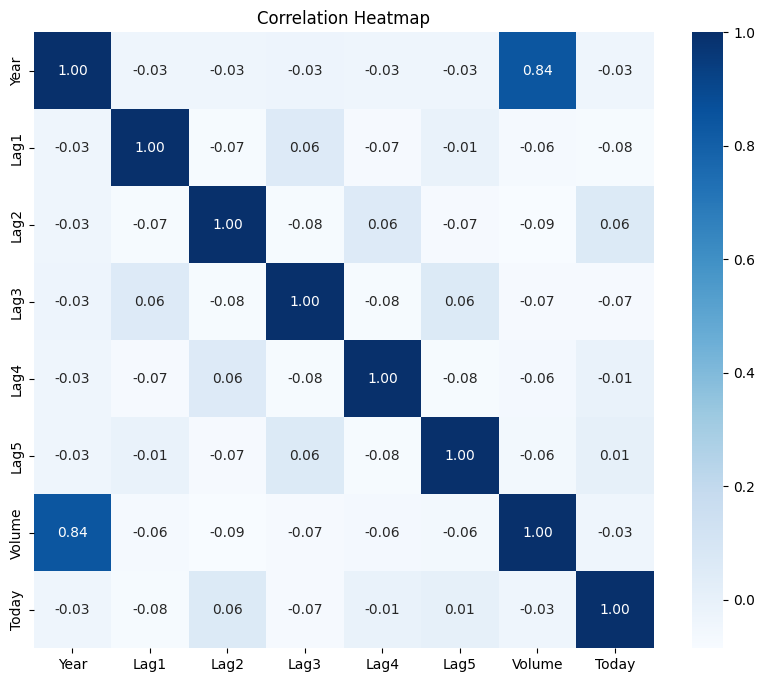

In [ ]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

While other relations are very weak, the correlation between Year and Volume is quite high, in the sense that with passing year, the Volume has increased with 84% of value, which is quite strong.

## Logistic Regression:

In [ ]:
direction=set(Weekly["Direction"])
Weekly["Direction"]=Weekly["Direction"].map({"Up":1,"Down":0}).astype(int)
print(Weekly.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1


 To convert Categorical data to Binary for any classification or regression algorithm, a mapping is done for the only categorical and our limelight variable too, viz Direction.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X = Weekly.drop('Direction', axis=1)
y = Weekly['Direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A 80:20 ratio is method in all parts of the code for the training and training datasets.

In [ ]:
import statsmodels.api as sm
X1_train = sm.add_constant(X_train)
model = sm.Logit(y_train,X1_train )
result = model.fit()
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  871
Model:                          Logit   Df Residuals:                      862
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        16:12:06   Log-Likelihood:            -2.6726e-06
converged:                      False   LL-Null:                       -600.83
Covariance Type:            nonrobust   LLR p-value:                4.181e-254
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2394.8843   2.23e+06     -0.001      0.999   -4.37e+06    4.36e+06
Year           1.1938   1123.277      0.001      0.999   -2200.38

None of the values are significant here, as is seen from the high p-values for all factors, compared to 0.05 or 0.10. There are no statistically significant variables here.

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = model1.predict(X_test)

Predicting values based on the logistic model

## Confusion Matrix and Accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[ 83   1]
 [  1 133]]
Accuracy of the Model: 99.08256880733946%


The model has acheived a 99% of model accuracy with only 2 instances of false predictions. It says the model is a good fit, even though the variables turn out to be insignificant statistically.

## Logistic Regression with dynamic time spans:

In [ ]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] >= 2009]
X_train1 = train[['Lag2']]
y_train1 = train['Direction']
X_test1 = test[['Lag2']]
y_test1 = test['Direction']

As it is said,  a training data period is taken from
from 1990 to 2008, with Lag2 as the only predictor. Also, for the predictions, data is truncated to values 2009 and 2010 for application.

In [ ]:
model11 = LogisticRegression(random_state = 0)
model11.fit(X_train1, y_train1)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = model11.predict(X_test1)

In [ ]:
cm1 = confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix: ")
print(cm1)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test1, y_pred1)*100))

Confusion Matrix: 
[[ 9 34]
 [ 5 56]]
Accuracy of the Model: 62.5%


For the truncated time zones, the accuracy has reduced to 62.5% compared to previous 99%, with 39 cases of false predictions too. The overall fraction of correct predictions is 65/104.

## KNN Classifier:

We try using multiple values to find the optimal K for which mean square error is the least.

0.1834862385321101
0.22477064220183487
0.1834862385321101
0.1743119266055046
0.16055045871559634
0.16055045871559634
0.13302752293577982
0.12844036697247707
0.12844036697247707
0.13761467889908258
0.13761467889908258
0.14220183486238533
0.12844036697247707
0.14678899082568808
0.14678899082568808
0.15137614678899083
0.13302752293577982
0.14220183486238533
0.12385321100917432
0.14678899082568808
0.11926605504587157
0.11009174311926606
0.12385321100917432
0.11467889908256881
0.11926605504587157
0.10550458715596331
0.11926605504587157
0.11467889908256881
0.11009174311926606
0.11009174311926606
0.0963302752293578
0.10091743119266056
0.08256880733944955
0.08256880733944955
0.0871559633027523
0.11009174311926606
0.11467889908256881
0.10550458715596331
0.10550458715596331


Text(0, 0.5, 'Mean Error')

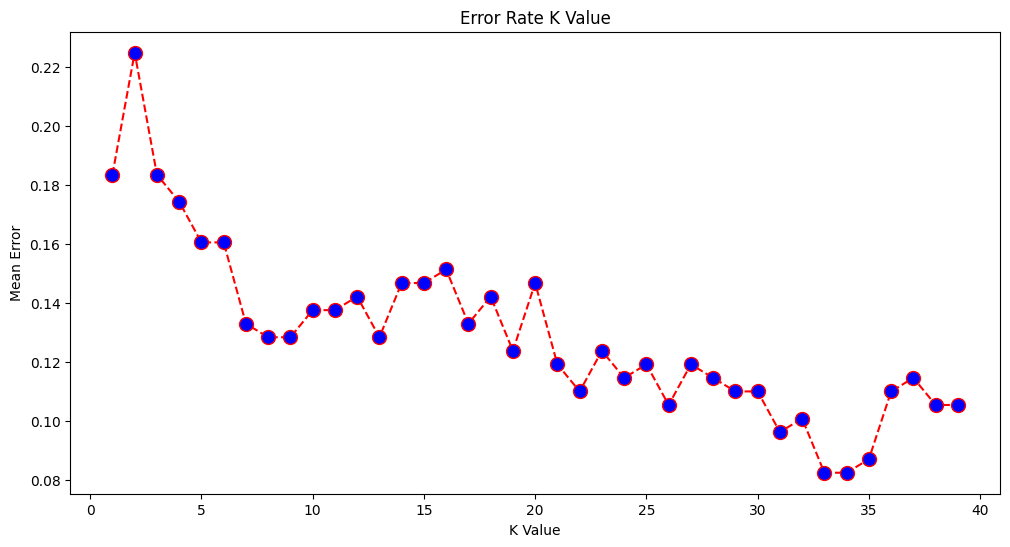

In [ ]:
error1 = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 39
for i in range(1, 40):
    modelK1 = KNeighborsClassifier(n_neighbors=i)
    modelK1.fit(X_train, y_train)
    pred_i1 = modelK1.predict(X_test)
    error1.append(np.mean(pred_i1 != y_test))
    print(np.mean(pred_i1 != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

0.1834862385321101
0.22477064220183487
0.1834862385321101
0.1743119266055046
0.16055045871559634
0.16055045871559634
0.13302752293577982
0.12844036697247707
0.12844036697247707
0.13761467889908258
0.13761467889908258
0.14220183486238533
0.12844036697247707
0.14678899082568808
0.14678899082568808
0.15137614678899083
0.13302752293577982
0.14220183486238533
0.12385321100917432
0.14678899082568808
0.11926605504587157
0.11009174311926606
0.12385321100917432
0.11467889908256881
0.11926605504587157
0.10550458715596331
0.11926605504587157
0.11467889908256881
0.11009174311926606
0.11009174311926606
0.0963302752293578
0.10091743119266056
0.08256880733944955
0.08256880733944955
0.0871559633027523


Text(0, 0.5, 'Mean Error')

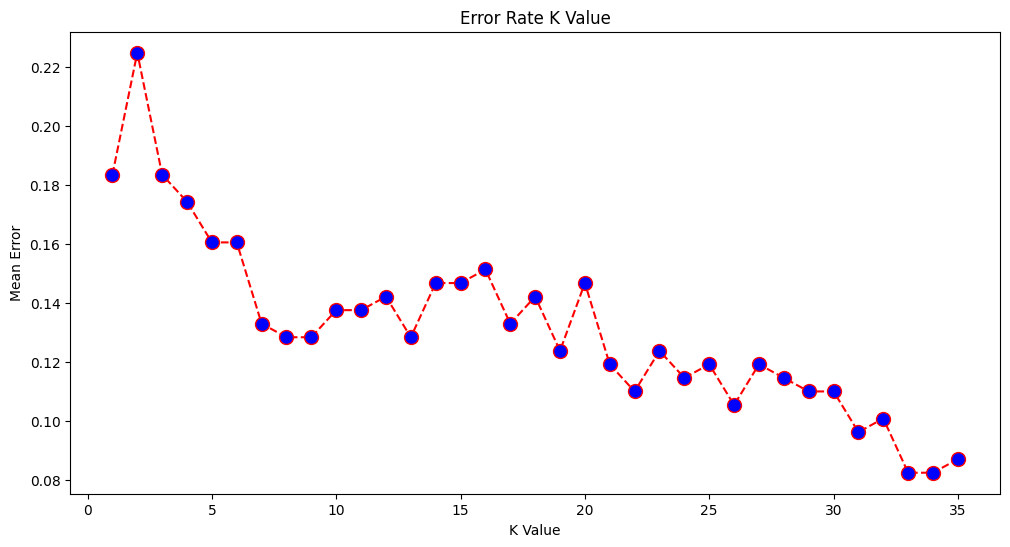

In [ ]:
error2 = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 35
for i in range(1, 36):
    modelK2 = KNeighborsClassifier(n_neighbors=i)
    modelK2.fit(X_train, y_train)
    pred_i2 = modelK2.predict(X_test)
    error2.append(np.mean(pred_i2 != y_test))
    print(np.mean(pred_i2 != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 36), error2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

0.1834862385321101
0.22477064220183487
0.1834862385321101
0.1743119266055046
0.16055045871559634
0.16055045871559634
0.13302752293577982
0.12844036697247707
0.12844036697247707
0.13761467889908258
0.13761467889908258
0.14220183486238533
0.12844036697247707
0.14678899082568808
0.14678899082568808
0.15137614678899083
0.13302752293577982
0.14220183486238533
0.12385321100917432
0.14678899082568808
0.11926605504587157
0.11009174311926606
0.12385321100917432
0.11467889908256881
0.11926605504587157
0.10550458715596331
0.11926605504587157
0.11467889908256881
0.11009174311926606
0.11009174311926606
0.0963302752293578
0.10091743119266056
0.08256880733944955
0.08256880733944955
0.0871559633027523
0.11009174311926606
0.11467889908256881
0.10550458715596331
0.10550458715596331
0.10550458715596331
0.11009174311926606
0.10550458715596331
0.11926605504587157
0.11926605504587157
0.11926605504587157
0.11467889908256881
0.12844036697247707
0.11926605504587157
0.11926605504587157
0.12385321100917432
0.133

Text(0, 0.5, 'Mean Error')

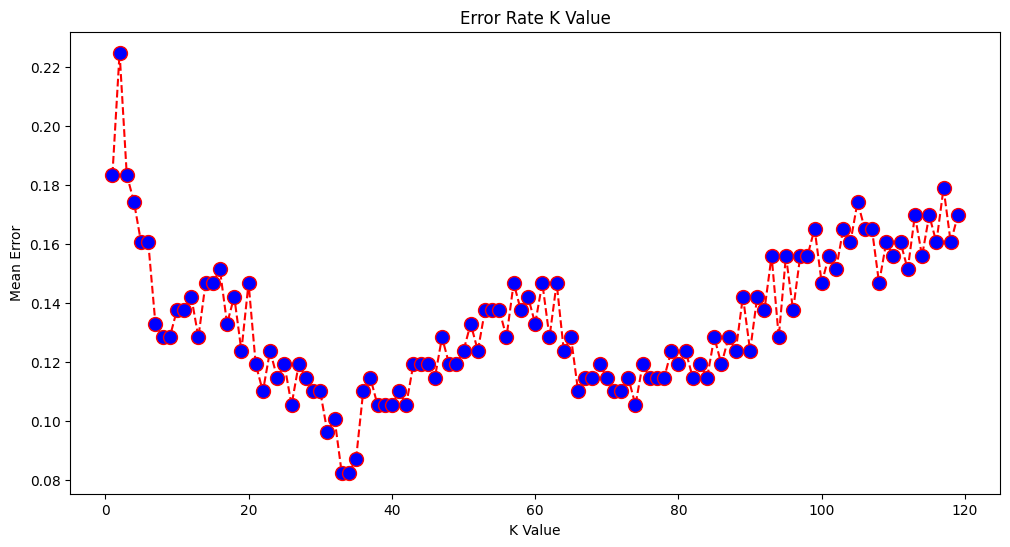

In [ ]:
error3 = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 119
for i in range(1, 120):
    modelK3 = KNeighborsClassifier(n_neighbors=i)
    modelK3.fit(X_train, y_train)
    pred_i3 = modelK3.predict(X_test)
    error3.append(np.mean(pred_i3 != y_test))
    print(np.mean(pred_i3 != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 120), error3, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

To summarise, we iterated our neighbours till 39,35 and 119, but in each case, found mean error least to the same value K, where K equals 33.


In [ ]:
Y_pred = modelK1.predict(X_test)
conf_matrixK = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrixK)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, Y_pred)*100))

Confusion Matrix:
 [[ 70  14]
 [  9 125]]
Accuracy of the Model: 89.44954128440367%


The Accuracy of the model is aptly good at 89.5 % approx with only 23 false predictions. Hence, we can choose K=33 as an optimal value for number of neighbours here.

# **Question 2: Auto dataset**

## Data Description:
A data frame with 392 observations on the following 9 variables:

mpg: Miles per gallon - a measure of fuel efficiency, indicating how many miles a vehicle can travel per gallon of fuel.

cylinders: The number of cylinders in the vehicle's engine, which can affect power output and fuel efficiency.

displacement: Engine displacement - the total volume of all the cylinders in the engine, measured in cubic centimeters or liters, indicating the engine size.

horsepower: The amount of power the engine produces, a measure of the engine's performance capacity.
weight: The total weight of the vehicle, which can significantly affect its fuel efficiency and acceleration.

acceleration: A measure of how quickly the vehicle can increase its speed, typically measured in seconds to go from 0 to 60 miles per hour.

year: The year the vehicle was manufactured, which can be indicative of the technology and fuel efficiency standards of the time.

origin: A categorical variable indicating the country or region where the vehicle was manufactured, which may correlate with design philosophies, including fuel efficiency.

name: The make and model of the vehicle, a unique identifier for each type of car.

mpg01: A binary variable derived from mpg, indicating high (1) or low (0) fuel efficiency based on whether the mpg value is above or below the median mpg.

In [ ]:
Auto=pd.read_csv('/content/drive/MyDrive/Auto - Auto.csv')
df2=Auto.copy()

In [ ]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
Auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
Auto.shape

(397, 10)

In [ ]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
null_values1 = Auto.isnull().sum()
print("Null Values:")
print(null_values1)

Null Values:
mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
mpg01           0
dtype: int64


For the horsepower, we have 5 null values. Considering the size of data as 397 rows, we remove the null values, thereby reducing the size to 394.

In [ ]:
Auto1=Auto.dropna()
Auto1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
mpg01           0
dtype: int64

In [ ]:
Auto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   mpg01         392 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 33.7+ KB


## Exploratory Data Analysis based on Median:

In [ ]:
median_mpg = Auto1['mpg'].median()
Auto1['mpg01'] = (Auto1['mpg'] > median_mpg).astype(int)
median_mpg

22.75

As demanded, a new variable is created for miles per gallon, it is of binary outcomes, 1 for value greater than median, 0 for not.

In [ ]:
Auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


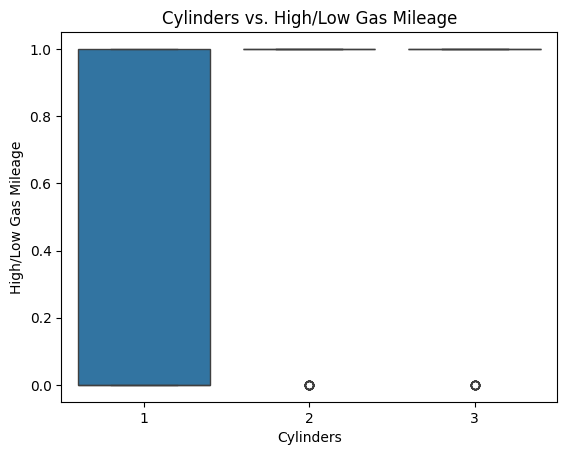

In [ ]:
sns.boxplot(x='origin', y='mpg01', data=Auto1)
plt.xlabel('Cylinders')
plt.ylabel('High/Low Gas Mileage')
plt.title('Cylinders vs. High/Low Gas Mileage')
plt.show()

Except cyclinders 1, 2 and 3, none have mpg more than 22.75, or in other words the median.
The first cyclinder has almost all the values starting from minimum to maximum mpg, while Cyclinders 2 and 3 are mostly set on extreme data.

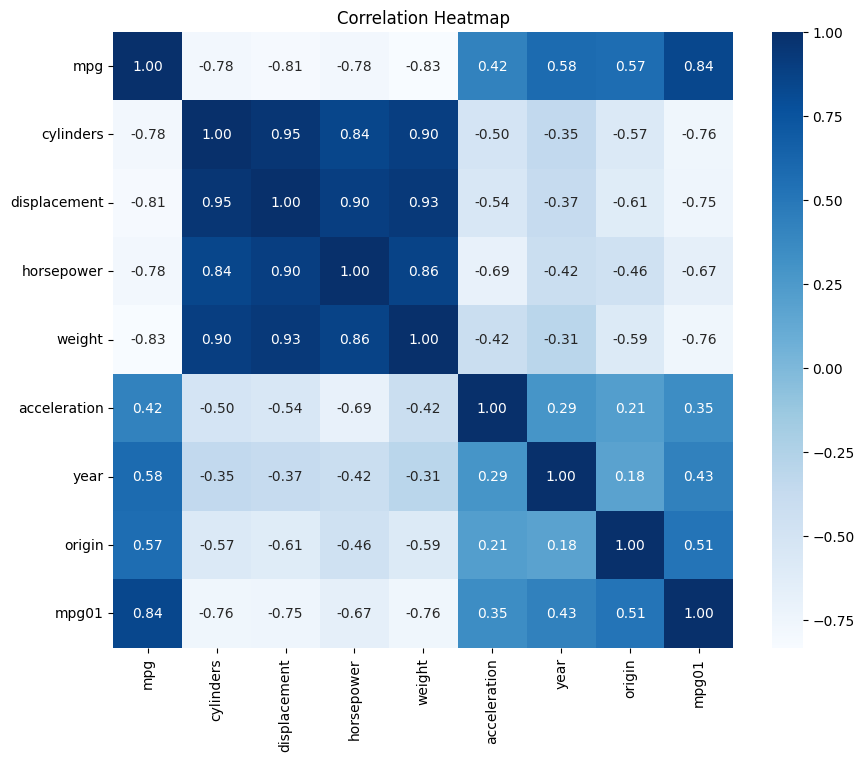

In [ ]:
correlation_matrix2 = Auto1.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Strong correlation is seen among the factors displacement, weight and horsepower. Therefore, multicollinearity do exists and to avoid it, we remove one or more of the correlated features to over come this influence.

Almost all the regressors or factors are moderately or strongly correlated with our target variable viz mpg.

## Logistic Regression:

In [ ]:
X2 = Auto1.drop(['mpg01','name'], axis=1)
y2 = Auto1['mpg01']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

The above segregation is on the basis of all the features.

In the code below, there are some more features,this is because we know such variables possess multicollinearity, hence keeping all of them might not be appropriate. We analyse the errors to understand which one is better.

In [ ]:
X2new = Auto1.drop(['mpg01', 'displacement','weight','mpg','name'],axis=1)
y2new = Auto1['mpg01']
X_train22, X_test22, y_train22, y_test22 = train_test_split(X2new, y2new, test_size=0.2, random_state=42)

In [ ]:
model21 = LogisticRegression(random_state = 0)
model21.fit(X_train2, y_train2)

LogisticRegression(random_state=0)

In [ ]:
model22 = LogisticRegression(random_state = 0)
model22.fit(X_train22, y_train22)

LogisticRegression(random_state=0)

In [ ]:
y_pred21 = model21.predict(X_test2)
y_pred22 = model22.predict(X_test22)

In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test2,y_pred21 )
print(mse1)

mse2 = mean_squared_error(y_test22,y_pred22 )
print(mse2)

0.05063291139240506
0.12658227848101267


The mean square error for model having all the features is less compared to only a few chosen ones. This shows that presence of all features do positively affects the goodness of model even though it is not appropriate to be done, as the variables are interrelated.

## KNN Classifier:

0.13924050632911392
0.13924050632911392
0.0759493670886076
0.11392405063291139
0.11392405063291139
0.10126582278481013
0.11392405063291139
0.11392405063291139
0.13924050632911392
0.11392405063291139
0.1518987341772152
0.11392405063291139
0.12658227848101267
0.11392405063291139
0.13924050632911392
0.13924050632911392
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.13924050632911392
0.1518987341772152
0.13924050632911392
0.1518987341772152
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.12658227848101267
0.13924050632911392
0.12658227848101267
0.13924050632911392


Text(0, 0.5, 'Mean Error')

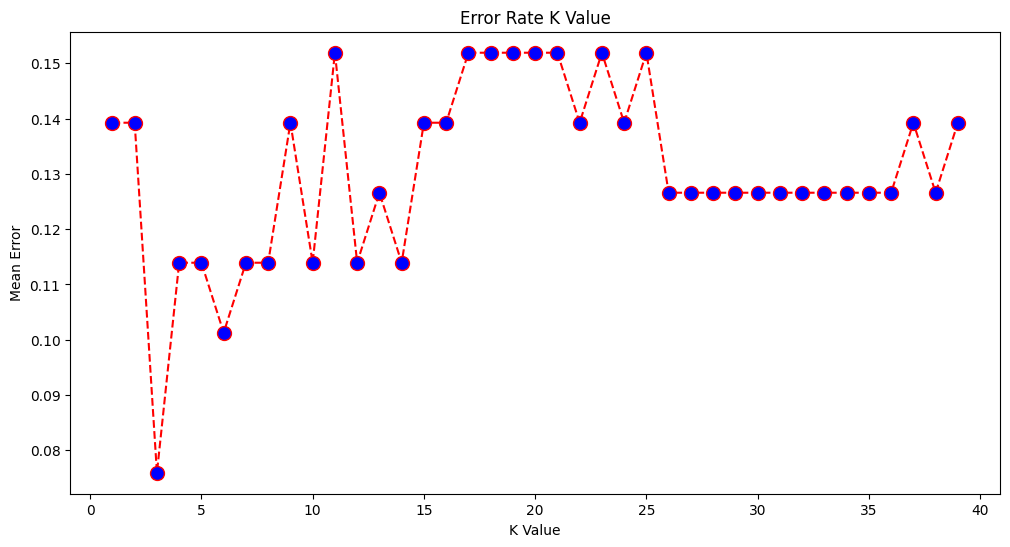

In [ ]:
error21 = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 39
for i in range(1, 40):
    modelK21 = KNeighborsClassifier(n_neighbors=i)
    modelK21.fit(X_train2, y_train2)
    pred_i21 = modelK21.predict(X_test2)
    error21.append(np.mean(pred_i21 != y_test2))
    print(np.mean(pred_i21 != y_test2))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error21, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

This KNN model is based on all the features as we used in first logistic model. Here, K=3 is the optimal number of neighbours obtained.

0.12658227848101267
0.12658227848101267
0.13924050632911392
0.13924050632911392
0.13924050632911392
0.13924050632911392
0.1518987341772152
0.12658227848101267
0.13924050632911392
0.13924050632911392
0.1518987341772152
0.189873417721519
0.17721518987341772
0.189873417721519
0.20253164556962025
0.17721518987341772
0.189873417721519
0.189873417721519
0.17721518987341772
0.17721518987341772
0.17721518987341772
0.189873417721519
0.17721518987341772
0.16455696202531644
0.17721518987341772
0.17721518987341772
0.17721518987341772
0.1518987341772152
0.16455696202531644
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.1518987341772152
0.13924050632911392
0.13924050632911392
0.1518987341772152
0.13924050632911392
0.1518987341772152


Text(0, 0.5, 'Mean Error')

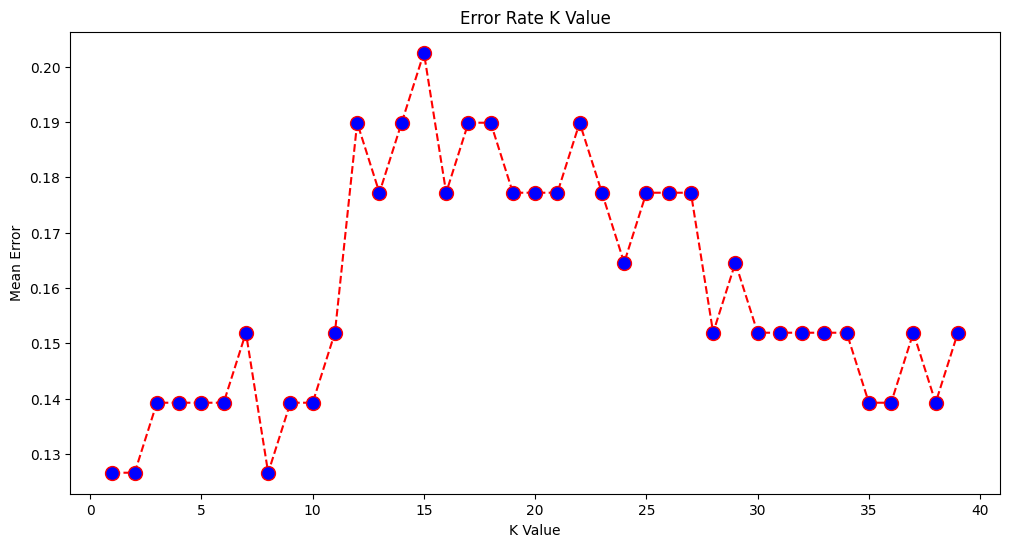

In [ ]:
error22 = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 39
for i in range(1, 40):
    modelK22 = KNeighborsClassifier(n_neighbors=i)
    modelK22.fit(X_train22, y_train22)
    pred_i22 = modelK22.predict(X_test22)
    error22.append(np.mean(pred_i22 != y_test22))
    print(np.mean(pred_i22 != y_test22))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error22, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

This model is based on specific features to check for multicollinearity. Here, the number of K is reduced to 0, which is abrupt.

# Conclusions:

The accuracy of model in logistic regression for Weekly dataset declines when we truncate it on the basis of time spans. K=33 is the optimal number of neighbours obtained in terms of KNN.

Likewise, the accuracy of model in logistic regression for Auto dataset declines when use selective features for analysis and not all. K=3 is the number of neighbours obtained for KNN, considering the entire data except target variable for my model analysis.
